# Tutorial: 2D Band Structure Visualization

## Introduction

Two-dimensional (2D) band structure visualization is a powerful technique for analyzing electronic properties of materials in reciprocal space. Unlike traditional 1D band structure plots that show energy dispersion along specific high-symmetry paths, 2D band structures provide a complete picture of electronic states across the entire Brillouin zone.

## What are 2D Band Structures?

### Physical Concept

2D band structures represent the electronic energy landscape as a function of two momentum coordinates (kₓ, kᵧ) in the Brillouin zone. This visualization technique:

- **Reveals complete dispersion**: Shows energy variation across the entire 2D k-space
- **Identifies critical points**: Easily spots band extrema, saddle points, and degeneracies
- **Visualizes topology**: Reveals topological features like Dirac cones and band inversions
- **Enables surface analysis**: Perfect for studying 2D materials and surface states

### Key Applications

2D band structure plots are particularly valuable for:

1. **2D Materials**: Graphene, transition metal dichalcogenides, topological insulators
2. **Fermi Surface Analysis**: Understanding electron and hole pockets
3. **Topological Materials**: Identifying Dirac/Weyl points and topological phase transitions
4. **Surface States**: Analyzing surface band structures in thin films
5. **Electronic Transport**: Predicting conductivity and carrier mobility

### Visualization Modes

PyProcar offers several visualization modes for 2D band structures:

- **Plain mode**: Simple energy surfaces for each band
- **Parametric mode**: Color-coded atomic/orbital projections
- **Property projection**: Visualization of derived properties (velocity, effective mass)
- **Spin texture**: Vector field representation of spin orientations

## System Overview: Graphene as a Model System

In this tutorial, we'll primarily use **graphene** as our example system because:

- **Simple structure**: Hexagonal lattice with two carbon atoms per unit cell
- **Rich physics**: Contains famous Dirac cones at K and K' points
- **Well-understood**: Extensively studied electronic structure
- **Excellent example**: Demonstrates key concepts clearly

Graphene's electronic structure features:
- **Linear dispersion**: Dirac cones at K and K' points
- **Zero bandgap**: Semimetallic behavior
- **High symmetry**: Hexagonal Brillouin zone
- **Two bands**: π and π* bands from pz orbitals

Let's begin by setting up our environment and exploring different visualization techniques.

## Setting up the Environment

In this section, we'll set up our computational environment for 2D band structure visualization. We'll import necessary libraries and download example data for graphene calculations.

Let's set up our environment:

In [1]:
# Import required libraries
from pathlib import Path
import pyprocar
import numpy as np
import pyvista as pv

# Set up PyVista for interactive 3D plotting
# 'trame' backend enables interactive plots in Jupyter notebooks
pv.set_jupyter_backend('static')

# Setup data directories
CURRENT_DIR = Path(".").resolve()
print(f"Current working directory: {CURRENT_DIR}")

# Download the 2D band structure example data
BANDS_2D_PATH = "data/examples/bands/2d-bands" 
pyprocar.download_from_hf(relpath=BANDS_2D_PATH, output_path=CURRENT_DIR)

# Define data directories for different materials
BANDS_2D_DATA_DIR = CURRENT_DIR / BANDS_2D_PATH
GRAPHENE_DATA_DIR = BANDS_2D_DATA_DIR / "graphene"
BISB_DATA_DIR = BANDS_2D_DATA_DIR / "bisb_monolayer"

print(f"2D bands data downloaded to: {BANDS_2D_DATA_DIR}")
print(f"Graphene data directory: {GRAPHENE_DATA_DIR}")
print(f"BiSb monolayer data directory: {BISB_DATA_DIR}")


Current working directory: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure
Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\2d-bands
2D bands data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\2d-bands
Graphene data directory: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\2d-bands\graphene
BiSb monolayer data directory: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\2d-bands\bisb_monolayer


## Example 1: Plain Mode - Basic 2D Band Structure

### What is Plain Mode?

Plain mode provides the fundamental 2D band structure visualization by showing energy surfaces for selected bands across the 2D Brillouin zone. This mode:

- **Displays energy surfaces**: Each band is represented as a 3D surface
- **Shows band dispersion**: Reveals how energy varies with momentum
- **Identifies critical points**: Band extrema and saddle points are clearly visible
- **Enables Fermi surface analysis**: Can overlay Fermi level planes

### Key Features for Graphene

In this example, we'll visualize graphene's famous **π and π* bands** (bands 3 and 4), which form the characteristic Dirac cones at the K and K' points. We'll see:

1. **Dirac cones**: Linear dispersion creating cone-shaped surfaces
2. **Symmetry**: Hexagonal Brillouin zone symmetry
3. **Band touching**: Zero bandgap at Dirac points
4. **Extended zones**: Multiple Brillouin zones for complete picture

### Parameters Explanation

- **`bands=[3, 4]`**: Focus on π and π* bands around Fermi level
- **`add_fermi_plane=True`**: Show Fermi level as a reference plane
- **`extended_zone_directions`**: Include neighboring Brillouin zones
- **`energy_lim=[-2.5, 0.8]`**: Energy window around the Dirac point

Let's create our first 2D band structure plot:

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\pyvista\core\filters\data_object.py:179: PyVistaDeprecationWarning: The default value of `inplace` for the filter `BandStructure2D.transform` will change in the future. Previously it defaulted to `True`, but will change to `False`. Explicitly set `inplace` to `True` or `False` to silence this warning.
  warnings.warn(msg, PyVistaDeprecationWarning)
c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\pyvista\core\filters\data_object.py:179: PyVistaDeprecationWarning: The default value of `inplace` for the filter `BrillouinZone2D.transform` will change in the future. Previously it defaulted to `True`, but will change to `False`. Explicitly set `inplace` to `True` or `False` to silence this warning.
  warnings.warn(msg, PyVistaDeprecationWarning)
c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\pyvista\core\utilities\points.py:77: UserWarning: Points is not a float type. This can cause issues when transforming or 

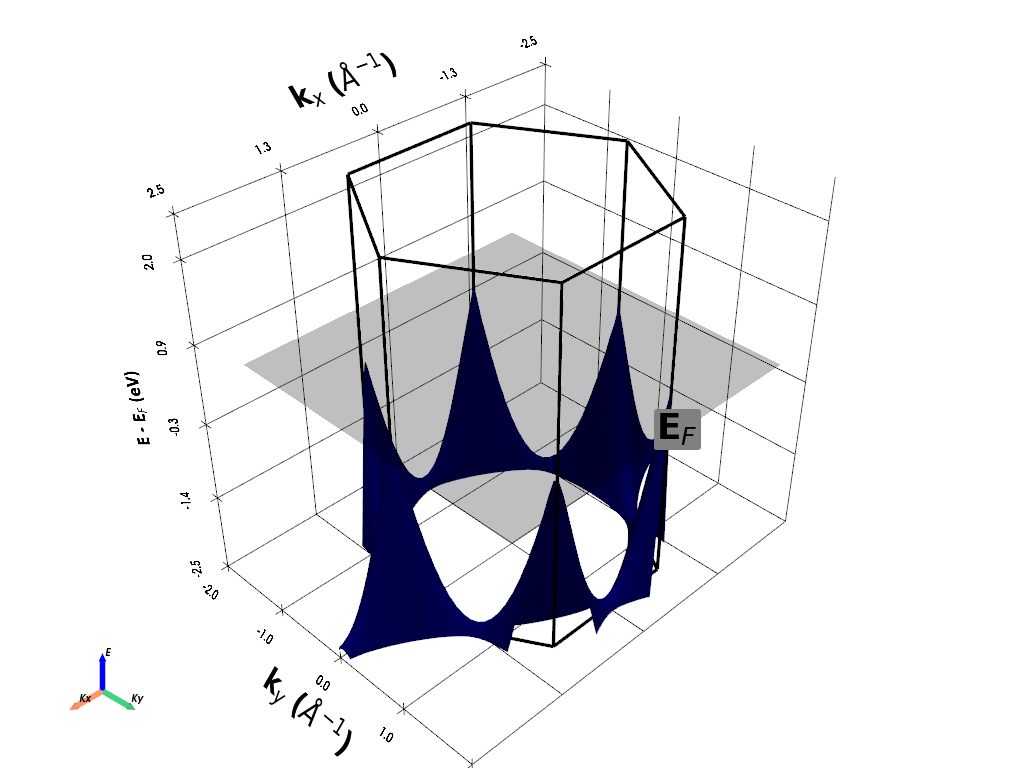

To save an image of where the camera is at time when the window closes,
set the `save_2d` parameter and set `plotter_camera_pos` to the following: 
 [(8.795155119873563, 8.795155119873563, 8.545155117998402),
 (0.0, 0.0, -0.25000000187516225),
 (0.0, 0.0, 1.0)]

Plot interpretation:
• Two cone-shaped surfaces: π (lower) and π* (upper) bands
• Dirac points: Where cones touch at K and K' points
• Linear dispersion: Straight lines radiating from Dirac points
• Fermi plane: Intersects exactly at the Dirac points (zero bandgap)
• Hexagonal symmetry: Reflects graphene's crystal structure


In [2]:
# Initialize the handler with calculation parameters
handler = pyprocar.BandStructure2DHandler(
    code="vasp",                    # DFT code used for calculation
    dirname=GRAPHENE_DATA_DIR,      # Path to calculation data
    fermi=-0.795606,                # Fermi energy from the calculation (in eV)
)

print("Creating plain mode 2D band structure plot...")

# Plot the 2D band structure in plain mode
handler.plot_band_structure(
    mode="plain",                   # Basic energy surface visualization

    # Fermi level visualization
    add_fermi_plane=True,           # Show Fermi level as reference plane
    fermi_plane_size=4,             # Size of Fermi plane in k-space
    
    # Energy and k-space limits
    energy_lim=[-2.5, 2.0],         # Energy window around Dirac point

    show=True                       # Display the plot
)

print("\nPlot interpretation:")
print("• Two cone-shaped surfaces: π (lower) and π* (upper) bands")
print("• Dirac points: Where cones touch at K and K' points")
print("• Linear dispersion: Straight lines radiating from Dirac points")
print("• Fermi plane: Intersects exactly at the Dirac points (zero bandgap)")
print("• Hexagonal symmetry: Reflects graphene's crystal structure")

## Example 2: Parametric Mode - Atomic and Orbital Projections

### What is Parametric Mode?

Parametric mode enhances 2D band structure visualization by color-coding the energy surfaces according to atomic or orbital character. This reveals:

- **Atomic contributions**: Which atoms contribute to each electronic state
- **Orbital character**: Contribution from specific atomic orbitals (s, p, d, f)
- **Chemical bonding**: How atomic orbitals combine to form bands
- **Spatial distribution**: Where electronic states are localized

### Graphene Orbital Analysis

For graphene, we'll analyze the π-system formed by the **pz orbitals** of carbon atoms:

- **Two carbon atoms**: Per unit cell (atoms 0 and 1)
- **pz orbitals**: The py, px, and pz orbitals (indices 1, 2, 3)
- **π-bonding**: Out-of-plane pz orbitals form the π and π* bands
- **Sublattice structure**: Different contributions from A and B sublattices

### Color Interpretation

In the parametric plot:
- **Red/warm colors**: High contribution from selected atoms/orbitals
- **Blue/cool colors**: Low contribution from selected atoms/orbitals
- **Color intensity**: Proportional to the projection weight

Let's visualize the orbital character of graphene's π-bands:

If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- So

c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\pyvista\core\filters\data_object.py:179: PyVistaDeprecationWarning: The default value of `inplace` for the filter `BandStructure2D.transform` will change in the future. Previously it defaulted to `True`, but will change to `False`. Explicitly set `inplace` to `True` or `False` to silence this warning.
  warnings.warn(msg, PyVistaDeprecationWarning)
c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\pyvista\core\filters\data_object.py:179: PyVistaDeprecationWarning: The default value of `inplace` for the filter `BrillouinZone2D.transform` will change in the future. Previously it defaulted to `True`, but will change to `False`. Explicitly set `inplace` to `True` or `False` to silence this warning.
  warnings.warn(msg, PyVistaDeprecationWarning)
c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\pyvista\core\utilities\points.py:77: UserWarning: Points is not a float type. This can cause issues when transforming or 

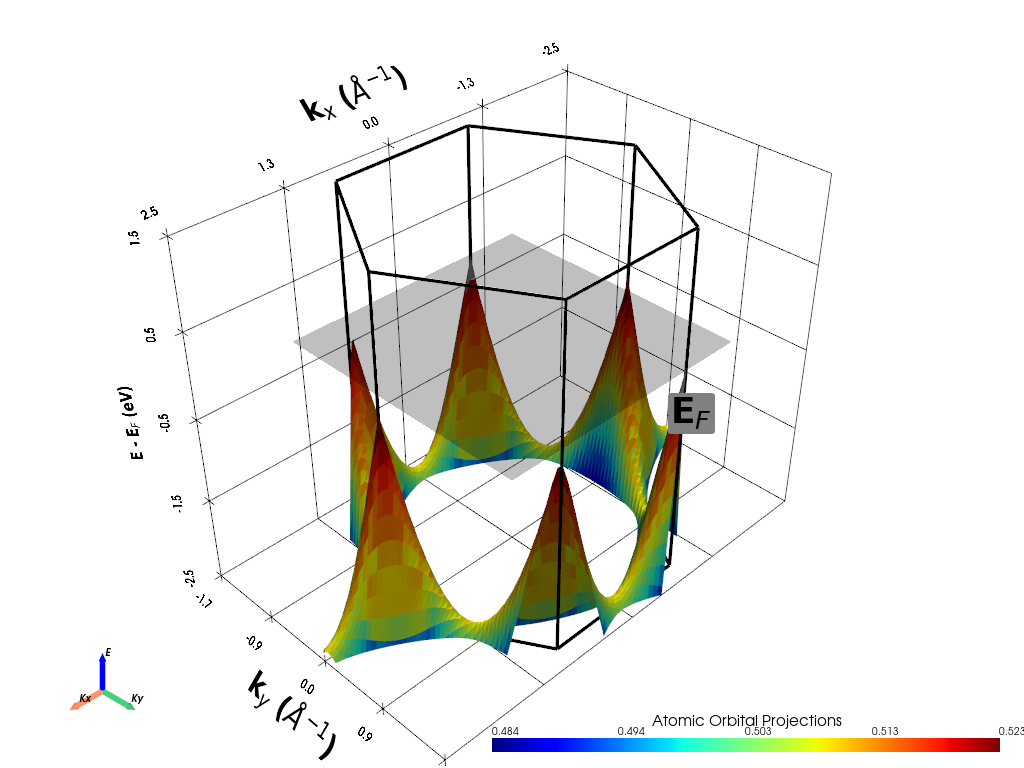

To save an image of where the camera is at time when the window closes,
set the `save_2d` parameter and set `plotter_camera_pos` to the following: 
 [(8.157873828404583, 8.157873828404583, 7.65787382652942),
 (0.0, 1.1102230246251565e-16, -0.5000000018751622),
 (0.0, 0.0, 1.0)]

Parametric plot interpretation:
• Color intensity: Strength of p-orbital contribution
• Red regions: High p-orbital character (especially pz)
• Blue regions: Lower p-orbital contribution
• π-bands: Should show strong pz character throughout
• Sublattice effects: May see subtle differences between atoms 0 and 1


In [3]:
# Initialize the handler with calculation parameters
handler = pyprocar.BandStructure2DHandler(
    code="vasp",                    # DFT code used for calculation
    dirname=GRAPHENE_DATA_DIR,      # Path to calculation data
    fermi=-0.795606,                # Fermi energy from the calculation (in eV)
)

# Parametric mode: Analyze orbital contributions to π-bands
print("Creating parametric mode visualization for graphene orbital character...")

# Define the atoms and orbitals to analyze
atoms = [0, 1]           # Both carbon atoms in the unit cell
orbitals = [1, 2, 3]     # px, py, pz orbitals (pz is most important for π-bands)
spins = [0]              # Non-spin-polarized calculation

print(f"Analyzing atoms: {atoms} (both carbon atoms)")
print(f"Analyzing orbitals: {orbitals} (px, py, pz orbitals)")

# Plot with orbital projections
handler.plot_band_structure(
    mode="parametric",              # Color-code by atomic/orbital projections
    atoms=atoms,                    # Carbon atoms to include
    orbitals=orbitals,              # p orbitals (especially pz)
    spins=spins,                    # Non-spin-polarized
    
    # Energy and k-space limits
    energy_lim=[-2.5, 1.5],         # Energy window around Dirac point
    
    # Visualization settings
    add_fermi_plane=True,           # Show Fermi level reference
    fermi_plane_size=3,             # Size of Fermi plane
    
    # Save options
    show=True
)

print("\nParametric plot interpretation:")
print("• Color intensity: Strength of p-orbital contribution")
print("• Red regions: High p-orbital character (especially pz)")
print("• Blue regions: Lower p-orbital contribution")
print("• π-bands: Should show strong pz character throughout")
print("• Sublattice effects: May see subtle differences between atoms 0 and 1")




## Example 3: Property Projection Mode - Physical Properties

### What is Property Projection Mode?

Property projection mode visualizes derived physical properties calculated from the electronic band structure. Instead of atomic/orbital projections, this mode shows:

- **Band velocity**: The group velocity v = ∇_k E(k) 
- **Effective mass**: Local curvature of energy bands
- **Berry curvature**: Topological properties of bands
- **Spin texture**: Spin orientation in momentum space

### Band Velocity Analysis

Band velocity is particularly important for transport properties:

- **Definition**: v = (1/ℏ)∇_k E(k) - gradient of energy with respect to k
- **Physical meaning**: Velocity of charge carriers
- **Units**: Typically m/s or km/s for visualization
- **Applications**: Predicting electrical and thermal conductivity

### Graphene Band Velocity

For graphene, band velocity reveals:

1. **Fermi velocity**: Constant ~10⁶ m/s near Dirac points
2. **Isotropic dispersion**: Equal velocity in all directions near K points
3. **Linear relationship**: Velocity proportional to distance from Dirac point
4. **Massless fermions**: Constant velocity independent of energy

Let's visualize the band velocity in graphene:

In [4]:
# Property projection mode: Visualize band velocity
print("Creating property projection visualization for band velocity...")

# Create handler for property analysis
handler = pyprocar.BandStructure2DHandler(
    code="vasp",
    dirname=GRAPHENE_DATA_DIR,
    fermi=-0.795606,
)

print("Calculating and visualizing band velocity...")

# Plot band velocity for π and π* bands
handler.plot_band_structure(
    mode="property_projection",        # Visualize computed properties
    property_name="bands_velocity",     # Group velocity v = ∇_k E(k)
      
    # Energy and visualization limits
    energy_lim=[-2.5, 1.5],           # Energy window around Dirac point
    fermi_plane_size=4,                # Size of Fermi level plane
    
    # Color bar and scaling
    scalar_bar_position_x=0.3,        # Position of color bar
    
    # Reference planes
    add_fermi_plane=True,              # Show Fermi level
    show=True
)

print("\nBand velocity interpretation:")
print("• Color scale: Magnitude of group velocity |v| = |∇_k E(k)|")
print("• Near Dirac points: Constant velocity ≈ 10⁶ m/s (Fermi velocity)")
print("• Linear dispersion: Velocity increases linearly away from K points")
print("• Isotropy: Equal velocity in all directions near Dirac cones")
print("• Transport: High velocity regions contribute most to conductivity")



Creating property projection visualization for band velocity...
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 

UnboundLocalError: local variable 'text' referenced before assignment

### Inverse Effective Mass


Additional property analysis: Effective mass...
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).


c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\pyvista\core\filters\data_object.py:179: PyVistaDeprecationWarning: The default value of `inplace` for the filter `BandStructure2D.transform` will change in the future. Previously it defaulted to `True`, but will change to `False`. Explicitly set `inplace` to `True` or `False` to silence this warning.
  warnings.warn(msg, PyVistaDeprecationWarning)
c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\pyvista\core\filters\data_object.py:179: PyVistaDeprecationWarning: The default value of `inplace` for the filter `BrillouinZone2D.transform` will change in the future. Previously it defaulted to `True`, but will change to `False`. Explicitly set `inplace` to `True` or `False` to silence this warning.
  warnings.warn(msg, PyVistaDeprecationWarning)
c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\pyvista\core\utilities\points.py:77: UserWarning: Points is not a float type. This can cause issues when transforming or 

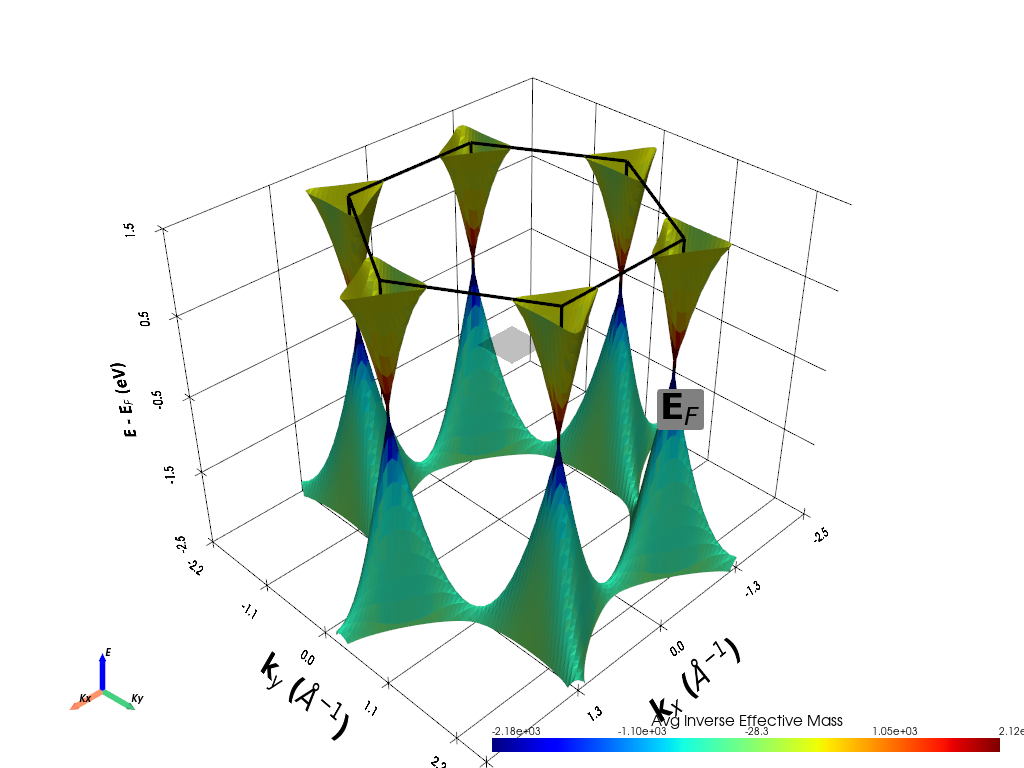

To save an image of where the camera is at time when the window closes,
set the `save_2d` parameter and set `plotter_camera_pos` to the following: 
 [(8.738292852679852, 8.738292852679852, 8.238292851382866),
 (0.0, 0.0, -0.5000000012969859),
 (0.0, 0.0, 1.0)]
• Effective mass plot created successfully
• Near Dirac points: Very small effective mass (massless fermions)
• Away from K points: Effective mass increases


In [7]:
# Additional analysis: Compare effective mass
print("\n" + "="*50)
print("Additional property analysis: Effective mass...")


handler_mass = pyprocar.BandStructure2DHandler(
    code="vasp",
    dirname=GRAPHENE_DATA_DIR,
    fermi=-0.795606,
    apply_symmetry=False
)

handler_mass.plot_band_structure(
    mode="property_projection",
    property_name="avg_inv_effective_mass",    # Inverse curvature
    energy_lim=[-2.5, 1.5],
    add_fermi_plane=True,
    show=True
)

print("• Effective mass plot created successfully")
print("• Near Dirac points: Very small effective mass (massless fermions)")
print("• Away from K points: Effective mass increases")


## Example 4: Spin Texture Mode - Advanced Topological Materials

### What is Spin Texture Mode?

Spin texture mode visualizes the spin orientation of electronic states across momentum space using vector fields. This advanced technique reveals:

- **Spin polarization**: Direction and magnitude of electron spin
- **Topological properties**: Berry curvature and Chern numbers  
- **Rashba/Dresselhaus effects**: Spin-orbit coupling signatures
- **Skyrmion textures**: Topological spin configurations

### System Change: BiSb Monolayer

For spin texture analysis, we switch to **BiSb monolayer**, a topological material with:

- **Strong spin-orbit coupling**: Heavy elements (Bi, Sb) provide large SOC
- **Non-collinear magnetism**: Spin directions vary in momentum space
- **Topological surface states**: Protected by time-reversal symmetry
- **Rich spin textures**: Complex spin patterns around high-symmetry points

### Physical Significance

Spin texture analysis reveals:

1. **Topological protection**: How spins are locked to momentum
2. **Transport properties**: Spin-dependent conductivity
3. **Magnetic responses**: Sensitivity to external fields
4. **Quantum phenomena**: Berry phase and topological invariants

### Visualization Elements

The spin texture plot shows:
- **Vector arrows**: Direction of spin at each k-point
- **Color coding**: Magnitude of spin components (Sx, Sy, Sz)
- **Surface height**: Energy of electronic states
- **Vector density**: Spatial resolution of spin sampling

Let's explore the spin texture of BiSb monolayer:

BiSb data found - proceeding with spin texture analysis...
Analyzing atoms: [0] (Bi atoms)
Analyzing orbitals: [4, 5, 6, 7, 8] (d orbitals for SOC)
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new 

c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\pyvista\core\filters\data_object.py:179: PyVistaDeprecationWarning: The default value of `inplace` for the filter `BandStructure2D.transform` will change in the future. Previously it defaulted to `True`, but will change to `False`. Explicitly set `inplace` to `True` or `False` to silence this warning.
  warnings.warn(msg, PyVistaDeprecationWarning)
c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\pyvista\core\filters\data_object.py:179: PyVistaDeprecationWarning: The default value of `inplace` for the filter `BrillouinZone2D.transform` will change in the future. Previously it defaulted to `True`, but will change to `False`. Explicitly set `inplace` to `True` or `False` to silence this warning.
  warnings.warn(msg, PyVistaDeprecationWarning)


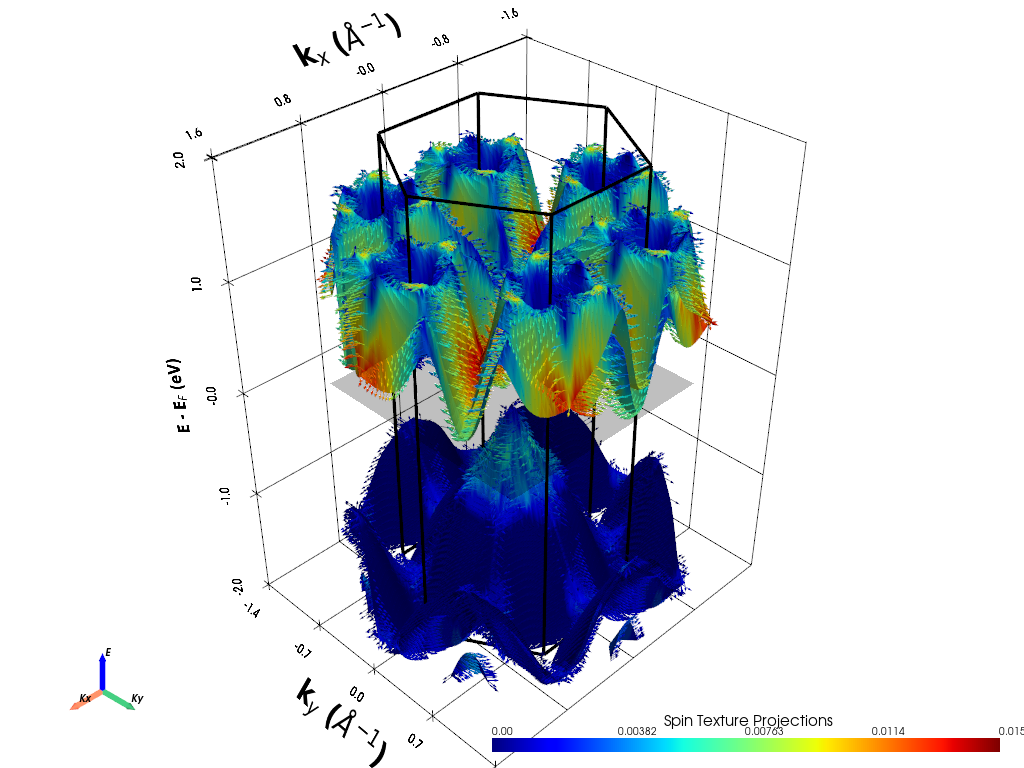

To save an image of where the camera is at time when the window closes,
set the `save_2d` parameter and set `plotter_camera_pos` to the following: 
 [(6.435664180437791, 6.4356642996470805, 6.431334141413438),
 (-1.1920928955078125e-07, 0.0, -0.004330158233642578),
 (0.0, 0.0, 1.0)]

Spin texture interpretation:
• Vector arrows: Local spin direction at each k-point
• Arrow length: Magnitude of spin polarization
• Color coding: Spin component values (Sx, Sy, Sz)
• Swirling patterns: Topological spin textures
• Singularities: Points where spin direction is undefined
• Rashba effect: Spin locked perpendicular to momentum

Topological significance:
• Spin-momentum locking: Spins tied to crystal momentum
• Berry curvature: Related to topological charge
• Protected states: Robust against perturbations
• Transport: Spin-dependent conductivity patterns


In [8]:
print("BiSb data found - proceeding with spin texture analysis...")

# Define analysis parameters
atoms = [0]                    # Focus on Bi atoms
orbitals = [4, 5, 6, 7, 8]     # d orbitals (important for SOC effects)

print(f"Analyzing atoms: {atoms} (Bi atoms)")
print(f"Analyzing orbitals: {orbitals} (d orbitals for SOC)")

# Create handler for spin texture analysis
handler = pyprocar.BandStructure2DHandler(
    code="vasp",
    dirname=BISB_DATA_DIR,     # Path to non-collinear calculation
    fermi=-1.089351,                  # Fermi energy for BiSb
    apply_symmetry=False,           # Keep all k-points for texture
)

print("Creating spin texture visualization...")

# Plot spin texture
handler.plot_band_structure(
    mode="spin_texture",            # Activate spin texture mode
    spin_texture=True,              # Enable vector field display
    
    # Atomic and orbital selection
    atoms=atoms,                    # Bi atoms
    orbitals=orbitals,              # d orbitals
    spins=[3],                      # Sz component
    
    # Energy and spatial limits
    energy_lim=[-2, 2],             # Wide energy window
    fermi_plane_size=2,             # Fermi level reference
    add_fermi_plane=True,           # Show Fermi level
    
    # Visualization settings
    scalar_bar_position_x=0.3,      # Color bar position
    fermi_text_position=[0, 0.5, 0], # Fermi level label position
    
    # Save options
    show=True
)
    
print("\nSpin texture interpretation:")
print("• Vector arrows: Local spin direction at each k-point")
print("• Arrow length: Magnitude of spin polarization")
print("• Color coding: Spin component values (Sx, Sy, Sz)")
print("• Swirling patterns: Topological spin textures")
print("• Singularities: Points where spin direction is undefined")
print("• Rashba effect: Spin locked perpendicular to momentum")

print("\nTopological significance:")
print("• Spin-momentum locking: Spins tied to crystal momentum")
print("• Berry curvature: Related to topological charge")
print("• Protected states: Robust against perturbations")
print("• Transport: Spin-dependent conductivity patterns")


## Summary and Advanced Techniques

### What We Learned

This tutorial demonstrated the power of 2D band structure visualization using PyProcar. We explored four distinct visualization modes:

#### 1. **Plain Mode**
- **Purpose**: Basic energy surface visualization
- **Key insight**: Revealed graphene's Dirac cones and linear dispersion
- **Applications**: Fundamental band structure analysis, Fermi surface identification

#### 2. **Parametric Mode**
- **Purpose**: Atomic and orbital character analysis
- **Key insight**: Confirmed π-character of graphene bands from pz orbitals
- **Applications**: Chemical bonding analysis, orbital hybridization studies

#### 3. **Property Projection Mode**
- **Purpose**: Physical property visualization
- **Key insight**: Showed constant Fermi velocity in graphene's linear bands
- **Applications**: Transport property prediction, effective mass analysis

#### 4. **Spin Texture Mode**
- **Purpose**: Advanced topological analysis
- **Key insight**: Demonstrated spin-momentum locking in topological materials
- **Applications**: Topological characterization, spintronics research

### PyProcar 2D Workflow Summary

```python
# Standard 2D band structure workflow
handler = pyprocar.BandStructure2DHandler(
    code="vasp",
    dirname="path/to/data",
    fermi=fermi_energy,
    apply_symmetry=False    # Keep full BZ for 2D plots
)

handler.plot_band_structure(
    mode="plain",           # or "parametric", "property_projection", "spin_texture"
    bands=[list],           # Specific bands of interest
    energy_lim=[emin, emax], # Energy window
    save_3d="output.html",  # Interactive 3D
    save_2d="output.png",   # 2D slice
    show=True
)
```


